In [416]:
%matplotlib inline

from numpy import linspace, abs, log10, var
from scipy.fftpack import fftfreq, fftshift
import matplotlib.pyplot as plt
import peakutils
import pandas
from IPython.display import display, Audio
import time

SAMPLING_RATE = 100000

In [518]:
# Plot FFT frequency domain
def plot_output(fft_output, thres=0.95, logscale=False):
    plt.figure(figsize=(8, 4), dpi=80)
#    fft_output[100:len(fft_output)-100] = 0 
    fft_output = fftshift(fft_output)
#    freq = linspace(0, SAMPLING_RATE/2.0, len(fft_output))
    freq = fftshift(fftfreq(len(fft_output), 1/SAMPLING_RATE))

    if logscale:
        plt.plot(freq, 10 * log10(fft_output))
        plt.ylabel("Magnitude(dB)")
    else:
        plt.plot(freq, fft_output)
        plt.ylabel("Magnitude")
    plt.xlabel("Frequency(Hz)")
    plt.title("Frequency domain")

    peaks = peakutils.indexes(fft_output, thres=thres)
    if len(peaks) == 2:
            print("***** Detected! *****")
    elif len(peaks) == 1:
            print("***** Detected! *****")        
    print("Frequencies at peaks: {} Hz".format(freq[peaks]))
    print("Magnitude at peaks: {}".format(fft_output[peaks]))
    print("Number of peaks: {}".format(len(fft_output[peaks])))
    

Frequencies at peaks: [-34277.34375 -33789.0625  -33593.75     33593.75     33789.0625
  34277.34375] Hz
Magnitude at peaks: [282767.  251080.2 239000.1 256668.8 267728.  301308.7]
Number of peaks: 6


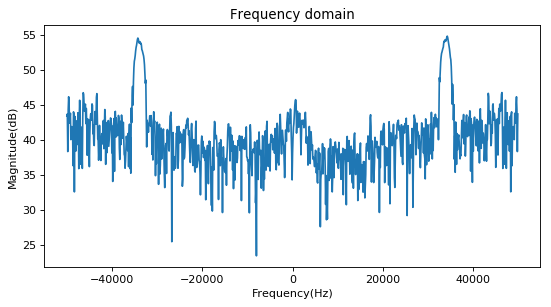

In [565]:
df = pandas.read_csv("./out.fft")
plot_output(df['Magnitude'], logscale=True, thres=0.7)